## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [4]:
df = df.loc[df['bedrooms'] < 20]

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
for col in df.columns:
    for x in col:
        if x not in string.ascii_letters:
            if x not in string.digits and x != '_':
                print(x)

In [19]:
df['sqft_basement'].value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
2300.0        1
20.0          1
768.0         1
1930.0        1
2050.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [57]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
df.groupby('grade')['price'].mean()

grade
3     2.620000e+05
4     2.120019e+05
5     2.485240e+05
6     3.019166e+05
7     4.025946e+05
8     5.429868e+05
9     7.737382e+05
10    1.072347e+06
11    1.497792e+06
12    2.202528e+06
13    3.710769e+06
Name: price, dtype: float64

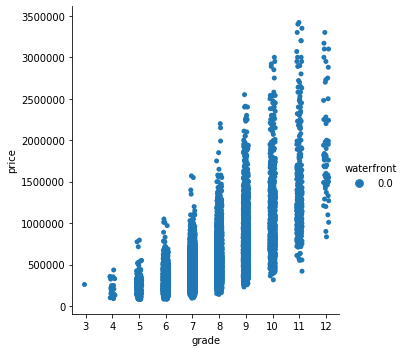

In [70]:
sns.catplot(x= 'grade', y = 'price', hue = 'waterfront', data = df)

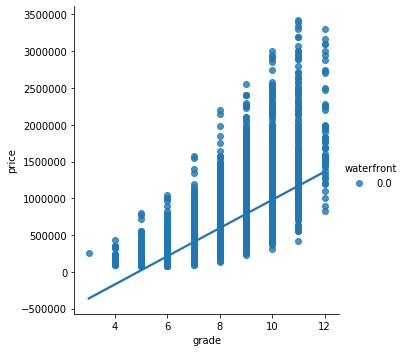

In [65]:
sns.lmplot(x= 'grade', y = 'price', hue='waterfront', data = df)

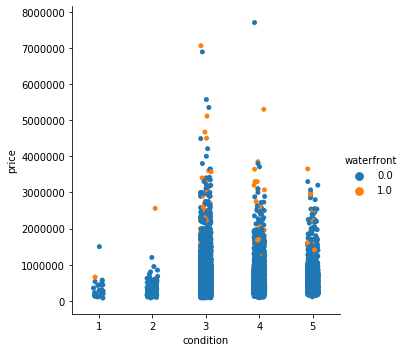

In [56]:
sns.catplot(x= 'condition', y = 'price', hue = 'waterfront', data = df)

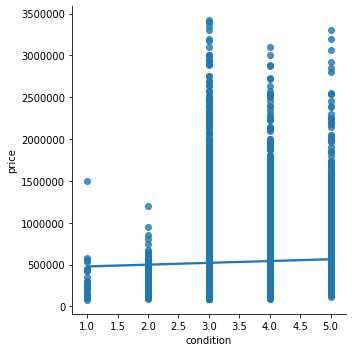

In [91]:
sns.lmplot(x= 'condition', y = 'price', data = df)

Quick glimpse to see the distribution of data among grades of houses to check if some may be outliers. We can quickly see that grade 11 houses seem to have one outlier for price and that the grade 13 houses seem to have a wide distribution of values

In [5]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: x.replace('?', '0'))

In [6]:
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19054 entries, 1 to 21596
Data columns (total 21 columns):
id               19054 non-null int64
date             19054 non-null object
price            19054 non-null float64
bedrooms         19054 non-null int64
bathrooms        19054 non-null float64
sqft_living      19054 non-null int64
sqft_lot         19054 non-null int64
floors           19054 non-null float64
waterfront       19054 non-null float64
view             18998 non-null float64
condition        19054 non-null int64
grade            19054 non-null int64
sqft_above       19054 non-null int64
sqft_basement    19054 non-null float64
yr_built         19054 non-null int64
yr_renovated     15669 non-null float64
zipcode          19054 non-null int64
lat              19054 non-null float64
long             19054 non-null float64
sqft_living15    19054 non-null int64
sqft_lot15       19054 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.8+ MB


In [7]:
df.drop('id',axis = 1, inplace = True)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [68]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
basement         21597 non-null bool
year             21597 non-null int64
Renovated        21597 non-nu

In [38]:
df['view'].value_counts(normalize = True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

In [47]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [48]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [9]:
df['waterfront'] = df['waterfront'].fillna(0)

In [10]:
df['view'] = df['view'].fillna(0)

In [42]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [11]:
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014,October
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,2014,December
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,2015,February
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,2014,December
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2015,February


In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

In [57]:
df['zipcode'].nunique()

70

In [17]:
df['view'] = df['view'].apply(lambda x: int(x))
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: int(x))
df['waterfront'] = df['waterfront'].apply(lambda x: int(x))

In [18]:
df['Renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement,year,Renovated,age_when_sold,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340,5650,False,2014,0,59,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690,7639,True,2014,1,63,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720,8062,False,2015,0,82,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360,5000,True,2014,0,49,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800,7503,False,2015,0,28,2


In [85]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basement', 'Renovated'],
      dtype='object')

In [19]:
df['age_when_sold'] = df.apply(lambda x: x['year'] - x['yr_built'], axis = 1)

In [89]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement,Renovated,year,month,age_when_sold
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,1,1,2014,12,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,0,0,2015,2,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,1,0,2014,12,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,0,0,2015,2,28
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,3,...,98053,47.6561,-122.005,4760,101930,1,0,2014,5,13


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
basement         21597 non-null int64
year             21597 non-null int64
Renovated        21597 non-null 

In [20]:
df = df.loc[df['grade'] < 13]
df = df.loc[df['waterfront'] < 1]
df = df.loc[df['price'] < 3600000]

In [21]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement,year,month,Renovated,age_when_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,0,2014,October,0,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,1,2014,December,1,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,0,2015,February,0,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,1,2014,December,0,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,0,2015,February,0,28


In [22]:
df.to_csv('master_df.csv', index = False)

In [48]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

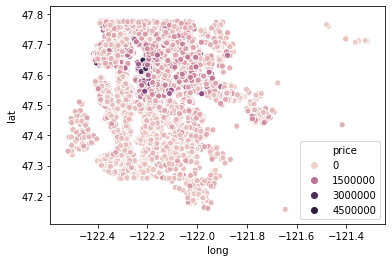

In [23]:
sns.scatterplot(x = 'long', y = 'lat', hue = 'price', data =df)